# Assignment 1

De titanic dataset gaat over een schip dat op 15 april 1912 zonk na een aanvaring met een ijsberg. Er waren helaas niet genoeg reddingsboten voor iedereen aan boord. Dit resulteerde in de dood van 1502 van de 2224 passagiers en bemanningsleden.

Er was een bepaald gelukselement betrokken bij het overleven, maar het lijkt erop dat sommige groepen mensen meer kans hadden om te overleven dan andere.

Door PCA te gebruiken, willen we de gemeenschappelijke kenmerken begrijpen die verklaren waarom sommige passagiers het overleefden en andere niet. En groepeer vervolgens passagiers met dezelfde kenmerken samen met behulp van k-means.

### De assignment kan als volgt worden ingedeeld:
#### 1 De data laden
#### 2 Begrijp de data en voer een verklarende analyse uit
#### 3 Data preprocessing door de nodige manipulaties uit te voeren (normalisatie, string data wijzigen in numerieke waarden)
#### 4 Het Principal Component Analysis-algoritme (PCA) gebruiken
#### 5 K-means implementeren


# 1 De data laden
Maak een functie loaddata die de  die de path naar de titanic data als parameter krijgt en vervolgens de data in een dataframe laadt. Het dataframe wordt uiteindelijk geretourneerd door de functie

In [24]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

BETEKENIS KOLOMMEN

    passengerId  -> unique value 
        survival -> Survival	0 = No, 1 = Yes
        pclass   ->	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
        sex      ->	Sex	                female, male 
        Age      ->	Age in years	
        sibsp    ->	# of siblings / spouses aboard the Titanic	
        parch    ->	# of parents / children aboard the Titanic	
        ticket   ->	Ticket number	
        fare     ->	Passenger fare	
        cabin    ->	Cabin number	
        embarked ->	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [25]:
def loaddata(path):
    #PassengerId is uniek. is gekozen als index 
    dataframe = pd.read_csv(path, index_col="PassengerId") 
    return dataframe
dataframe = loaddata("titanic.csv")

# 2 Data begrijpen 
### 2.1 Een samenvatting van de data krijgen

In [30]:
def summary(dataframe):
    print(dataframe.shape)# aantal rijen, aantal kolommen 
    print(list(dataframe.columns.values)) #lijst kolomnamen 
    print(dataframe.head(5)) # top 5 rijen 
    print(dataframe.tail(5)) #bottom 5 rijen
    print(dataframe.info()) # info metadata titanic dataset 


In [31]:
summary(dataframe)

(891, 11)
['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId              

### 2.2 Maak een paar plotten om de data te begrijpen
Je kunt de variabelen en hun distributie bekijken

In [22]:
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # matplotlib

def visualize(dataframe): 
    fig, ax = plt.subplots(2,5,figsize=(25, 10))

    sns.countplot(x=dataframe["Survived"],ax=ax[0,0]) # count of survivors and deceased
    sns.countplot(x=dataframe["Sex"],ax=ax[0,1]) # Count of each sex

#   Inzicht krijgen van variabele t.o.v. survival variabele  
    sns.barplot(x=dataframe["Survived"],y=dataframe["Pclass"],ax=ax[0,3]) # Pclass vs survival
    sns.barplot(x=dataframe["Survived"],y=dataframe["Sex"],ax=ax[0,2]) # Sex vs survival
    sns.boxplot(x=dataframe["Survived"],y=dataframe["Age"],ax=ax[0,4]) # Age vs survival
    sns.boxplot(x=dataframe["Survived"],y=dataframe["Fare"],ax=ax[1,0]) # Fare vs survival
    sns.barplot(x=dataframe["Survived"],y=dataframe["Embarked"],ax=ax[1,1]) # Embark vs survived
    sns.barplot(x=dataframe["Survived"],y=dataframe["SibSp"],ax=ax[1,2]) # SibSp vs survived
    sns.barplot(x=dataframe["Survived"],y=dataframe["Parch"],ax=ax[1,3]) # Parch vs survived

    dataframe["Cabin"] = dataframe["Cabin"].str[0]
    sns.barplot(x=dataframe["Survived"],y=dataframe["Cabin"],ax=ax[1,4]) # Cabin vs survived

    return fig.show()

<ipython-input-22-67b81bfb0ad0>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return fig.show()


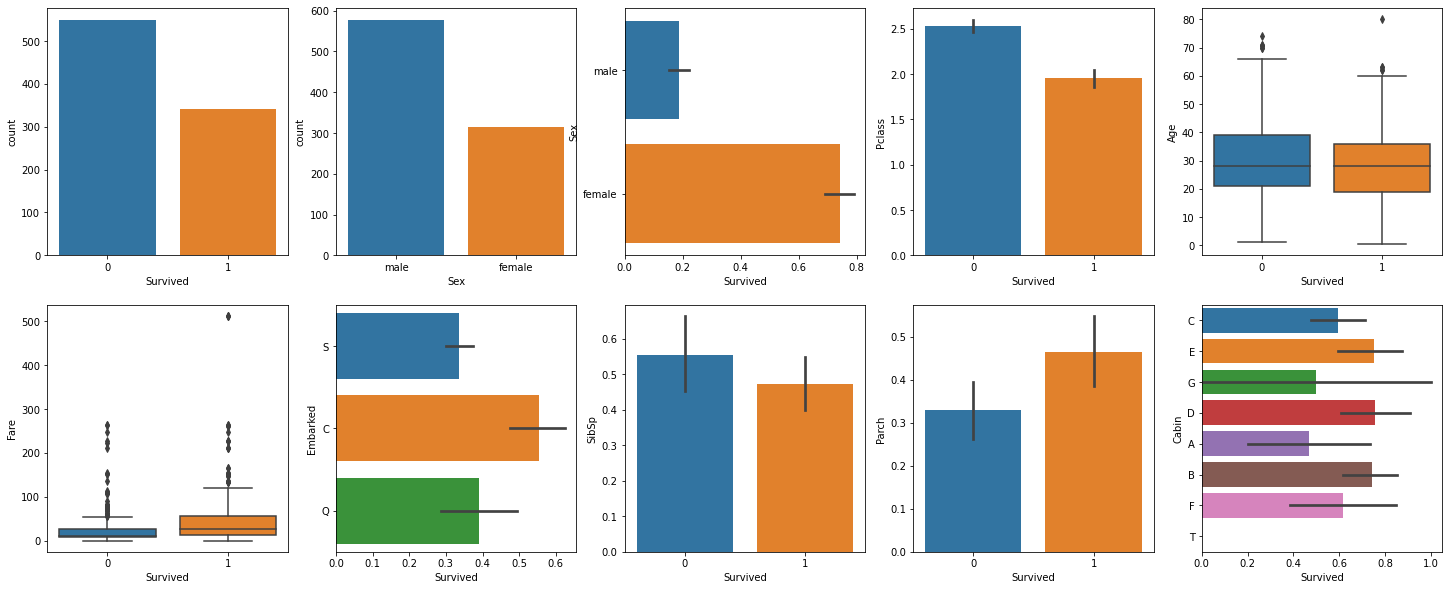

In [23]:
visualize(dataframe) #toont alle plots in 1 keer 

# 3 Data preprocessing
In dit deel kijk je of er missing values in de dataset en ga je daar vervolgens op een of meerdere manieren mee om.3

### 3-1 Onnodige kolommen verwijderen
Creer een functie die onnodige kolommen verwijdert.

In [170]:
def deletecolumn(dataframe):
    new_df = # ----Code hier
    return new_df

# outputDataframe = # ----Code hier

dataframe.isnull().sum()
#age= 177 nullwaarden en cabin heeft 687 null waarden. door teveel lege waarden verwijder ik cabin. 
dataframe_1 = dataframe.drop('Cabin', axis = 1)

In [168]:
dataframe_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

###   3-2 Check missing values
Maak een functie die controleert of de kenmerken in de Titanic data (doorgegeven als parameter) missing values hebben.

In [3]:
def checkMissing(dataframe):
    
    # ----- Code hier
    
    return numberMissingValues

noMissingValues_df =  # ----Code hier

SyntaxError: unexpected EOF while parsing (<ipython-input-3-df62593a5076>, line 3)

###   3-3 Omgaan met missing values
Maak een functie die de originele dataset met ontbrekende waarden accepteert en retourneert vervolgens de dataset waarin die missing values worden verwerkt.

In [ ]:
def dealMissing(dataframe):

    # ---- Schrijf de code om de missing values van Age met de gemidelde te vullen
    # ---- Schrijf de code om de missing values van Embarked met de meest voorkomende waarde te vullen
    
    return newDataframe

outputDataframe = # ----Code hier

### 3.4 String waarden naar numrical waarden transformeren
 

Maak een functie die String waarden van een kolom, doorgegeven als parameter, omzet in numerieke waarden. Pas deze functie vervolgens toe op kolommen met string data in de Titanic dataset.

In [ ]:
def transformcolumns(dataframe):

    # ----- Code hier
    
    return newDataframe

outputDataframe = # ----Code hier

### 3.5 Sla de features en het label (Survived) op in verschillende dataframes

In [ ]:
x = 
y =

### 3.6  z-score gebruiken om de data binnen de features te normaliseren
Maak een functie die de normalisatie van de z-score gebruikt om de features te normaliseren.
Je kunt de appendex raadplegen voor meer informatie over de z-score en om een voorbeeld te zien.


In [ ]:
def normalizex(dataframe):

    std_df =  #-----  code voor normalizatie
    
    return std_df

outputDataframe = # ----Code hier

# 4 Het Principal Component Analysis-algoritme (PCA) passen
Maak een functie die een Principal Component Analysis-algoritme (PCA) creert


In [ ]:
def pca(dataframe):
    
    pca = # ----- Code voor het pca object
    
    return pca

pcaObject = # ----Code hier

Maak een functie die de Principal components van de pca object krijgt

In [ ]:
def getprincipalComponents(pca, dataframe):
    
    principalComponents = # ----Code hier
    
    return principalComponents
    
principlComponents = # ----Code hier

Maak een functie die de "explained variance" van de pca object krijgt

In [ ]:
def getVariance(pca):
   
    # ----Code hier

# ----Code hier

# 5 k-means passen toe op de resulterende dataset van PCA om groepen passagiers te creëren
Maak een functie clustering die gebruikt the elbow method om het optimal aantal clusters te beperken. gebruik die function om nieuw labels te genereren.


In [ ]:
def clustering(principlaComponents):
    
    np.random.seed(2)
    
    # ----- Code hier
    #
    # 

    return labels

labels_kmeans = # ----Code hier

Maak een functie validateClusturing die rekent uit de homogeneity and completeness van de clusters. 

In [ ]:
def validateClusturing(labels, target):
    
    # ----- Code hier
    
